# Clean and Analyze Employee Exit Surveys

In this project we will analyze exit surveys from employees of the Dept of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Austrailia.

We wish to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()
dete_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
print(dete_survey.columns.get_loc('Professional Development'))
print(dete_survey.columns.get_loc('Gender'))

28
49


We will drop columns 28 - 48 because these answers don't appear relevant to our analysis.

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.iloc[:, 28:49], axis=1)

In [5]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
print(tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna=False))

print(tafe_survey.columns.get_loc(
    'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction'))
print(tafe_survey.columns.get_loc('Gender. What is your Gender?'))

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Study                                         2
Travel                                        2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64
18
66


We will drop the survey questions from the dataframe because they won't be useful for our analysis. We will also delete col 17 (main factor for leaving) because it contains mostly null values.

In [7]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.iloc[:, 17:66], axis=1)

## Cleaning up column names

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [9]:
mapping = {'Record ID': 'id',
           'CESSATION YEAR': 'cease_date',
           'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender',
           'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
           }
tafe_survey_updated.rename(columns=mapping, inplace=True)

In [10]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filtering Data for Separation Type

We only wish to analyze data that contains resignation as a separation type:

In [12]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated = tafe_survey_updated.dropna(subset=['separationtype'])

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [15]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [16]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Cleaning cease_date data and converting to float

Below we remove null values from cease_date in both dete and tafe datasets as well as null values in dete_start_date. We also exztract and convert dete cease_date values to floats.

In [17]:
dete_resignations['cease_date'].value_counts(dropna=False)


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [18]:
dete_resignations = dete_resignations.dropna(subset=['cease_date'])
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})', expand=True).astype(float)

In [19]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [20]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=False)

 2013.0    10
 2012.0    20
 2011.0    23
 2010.0    17
 2009.0    13
 2008.0    22
 2007.0    20
 2006.0    12
 2005.0    14
 2004.0    14
 2003.0     6
 2002.0     6
 2001.0     3
 2000.0     8
 1999.0     8
 1998.0     6
 1997.0     5
 1996.0     6
 1995.0     3
 1994.0     6
 1993.0     5
 1992.0     6
 1991.0     4
 1990.0     4
 1989.0     4
 1988.0     4
 1986.0     3
 1985.0     3
 1983.0     2
 1982.0     1
 1980.0     5
 1977.0     1
 1976.0     2
 1975.0     1
 1974.0     2
 1973.0     1
 1972.0     1
 1971.0     1
 1963.0     1
NaN        27
Name: dete_start_date, dtype: int64

In [21]:
dete_resignations = dete_resignations.dropna(subset=['dete_start_date'])

In [22]:
tafe_resignations['cease_date'].value_counts(dropna=False)

 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64

In [23]:
tafe_resignations = tafe_resignations.dropna(subset=['cease_date'])

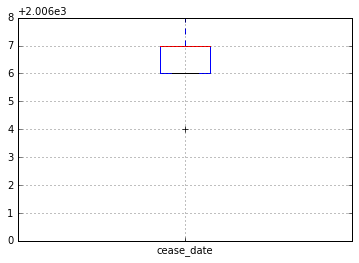

In [24]:
dete_resignations.boxplot('cease_date')

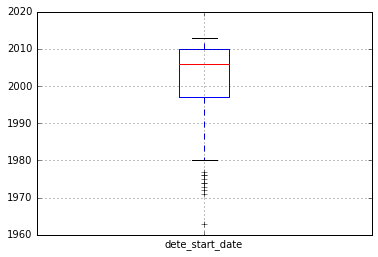

In [25]:
dete_resignations.boxplot('dete_start_date')

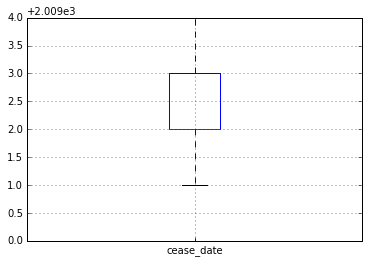

In [26]:
tafe_resignations.boxplot('cease_date')

## Creating a years of service column in dete_resignations

tafe_resignations has a column for institute service that corresponds with the length of time the employee worked at the institute. dete_resignations does not have this column but we can create the column by subtracting the dete_start_date column from the cease_date column.

In [27]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Mapping Job Dissatisfaction

A true value in any of the following columns will be mapped to a true value in a new columnd called dissatisfied.

    tafe_survey_updated:
        Contributing Factors. Dissatisfaction
        Contributing Factors. Job Dissatisfaction
    dete_survey_updated:
        job_dissatisfaction
        dissatisfaction_with_the_department
        physical_work_environment
        lack_of_recognition
        lack_of_job_security
        work_location
        employment_conditions
        work_life_balance
        workload

First we will clean up the values in the columns to be a common format of true, false or null. Then we will use the df.any method to aggregate the values into a single column dissatisfied to use for our analysis later. We will also create a new dataframe to store our results.

In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         275
Contributing Factors. Dissatisfaction      53
NaN                                         7
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      266
Job Dissatisfaction     62
NaN                      7
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
# Defining function to map values to a common format
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

In [31]:
tafe_diss_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

dete_diss_cols = ['job_dissatisfaction',
                  'dissatisfaction_with_the_department',
                  'physical_work_environment',
                  'lack_of_recognition',
                  'lack_of_job_security',
                  'work_location',
                  'employment_conditions',
                  'work_life_balance',
                  'workload'
                 ]

In [32]:
tafe_resignations[tafe_diss_cols] = tafe_resignations[tafe_diss_cols].applymap(update_vals)

In [33]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_diss_cols].any(axis=1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[dete_diss_cols].any(axis=1, skipna=False)

In [34]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combining the datasets

We will perform an outer join and delete columns that have less than 500 non null values:

In [35]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,Institute,WorkArea,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,disability,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,nesb,none_of_the_above,physical_work_environment,position,region,relocation,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,True,False,2012.0,Primary,2005.0,NaN,False,False,False,Permanent Full-time,Female,4.0,False,DETE,7,False,False,False,False,False,NaN,False,False,Teacher,Central Queensland,False,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,Education Queensland,True,False,2012.0,NaN,1994.0,NaN,False,True,True,Permanent Full-time,Female,6.0,False,DETE,18,False,False,False,False,True,NaN,False,False,Guidance Officer,Central Office,False,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,True,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Female,9.0,False,DETE,3,False,False,False,False,False,NaN,False,False,Teacher,North Queensland,False,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,NaN,False,False,2012.0,NaN,1997.0,NaN,True,True,False,Permanent Part-time,Female,10.0,False,DETE,15,True,True,False,False,False,NaN,False,False,Teacher Aide,NaN,False,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Male,12.0,False,DETE,3,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,True,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False


In [36]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


## Cleaning Institute Service

`insitute_Service` has values that have numbers embedded. We will extract the first number from each element.

In [37]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 24
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2
42.0                   1


In [38]:
extracted_service = (combined_updated.loc[:, 'institute_service']
                     .astype(str)
                     .str
                     .extract(r'(\d+)', expand=False)
                     .astype(float)
                    )

In [39]:
combined_updated['institute_service'] = extracted_service
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     28
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

## Mapping `institute_service` to Career Stage

We will map service length to career stages:

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

In [40]:
def career_map(val):
    if pd.isnull(val) == True:
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'

In [41]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_map)

In [42]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        134
Established     62
Name: service_cat, dtype: int64

## Initial Analysis

In [45]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    375
True     226
NaN        7
Name: dissatisfied, dtype: int64

Imputing NaN values as False because it is the most common response.

In [46]:
combined_updated['dissatisfied'].fillna(False, inplace=True)

In [47]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    382
True     226
Name: dissatisfied, dtype: int64

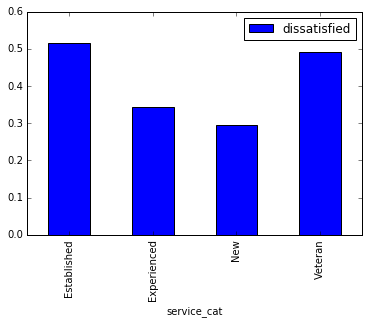

In [49]:
diss_employees_group = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
diss_employees_group.plot(kind='bar')

## Conclusion

Dissatisfation is highest amoung most experienced employees. Steps should be taken to address dissatisfaction among established and veteran employees.